In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Задание 1.  

Выбор гипотезы:
Суммарное число баллов каждой гипотезы:  
1 - 18  
2 - 24  
3 - 20  
4 - 19  

т.е. выбираем вторую версию, поскольку она набрала максимальный балл по этой карточке.

# Задание 2. 

Метрики эксперимента:  

Ключевая метрика: процент перешедших по ссылке от открывших письмо  
  
Смежные: 
- число открытых e-mail
- процент перешедших не в мобильное приложение, а с компьютера (поскольку улучшаем именно мобильное приложение, повышение этой метрики будет показывать, что  вмешался какой-то сторонний фактор, а наше изменение роли не сыграло)
- стоит отслеживать конверсию в какие-либо действия на сайте

# Задание 3. Расчёт ожидаемого эффекта по данным




In [10]:
# Чтение данных  
# Проверка качества датасета
# прочитать датасет
users_opened = pd.read_csv('m8_task\Data for MDE - opened.csv')

users_clicked = pd.read_csv('m8_task\Data for MDE - clicked.csv')

# узнать размер
print(users_opened.shape)
print(users_clicked.shape)

# проверить на Nan 

print('Nan?')
print(users_opened.isna().sum())
print(users_clicked.isna().sum())

# в user id нет дубликатов
print('Дубликаты')
print(users_opened.duplicated(subset='user_id', keep=False).value_counts())
print(users_clicked.duplicated(subset='user_id', keep=False).value_counts())

# проверить формат
print('Типы данных в столбцах')
print(users_opened.dtypes)

# поменять тип данных певрого столбца на datetime

users_opened.date =  pd.to_datetime(users_opened.date, format='%d.%m.%Y') 
users_clicked.date = pd.to_datetime(users_clicked.date, format='%d.%m.%Y') 
      
# посмотреть  строчки
print(users_opened.head(3))
print(users_opened.tail(3))
print(users_opened.max())



(4853, 2)
(490, 2)
Nan?
date       0
user_id    0
dtype: int64
date       0
user_id    0
dtype: int64
Дубликаты
False    4853
Name: count, dtype: int64
False    490
Name: count, dtype: int64
Типы данных в столбцах
date       object
user_id     int64
dtype: object
        date  user_id
0 2023-01-01   101232
1 2023-01-01   101233
2 2023-01-01   101234
           date  user_id
4850 2023-02-28   106082
4851 2023-02-28   106083
4852 2023-02-28   106084
date       2023-02-28 00:00:00
user_id                 106084
dtype: object


In [13]:
# Уровень конверсии в клики в день, средняя
opened_by_date = users_opened.loc[:, ['date', 'user_id']].groupby(['date']).count()
clicked_by_date = users_clicked.loc[:, ['date', 'user_id']].groupby(['date']).count()

o_c_by_date = opened_by_date.merge(clicked_by_date, how='inner', on='date')

In [43]:
o_c_by_date

,user_id_x,user_id_y
date,,
2023-01-01,84,8
2023-01-02,81,8
2023-01-13,81,8
2023-01-14,87,7
2023-01-15,83,9
2023-01-16,82,8
2023-01-17,80,7
2023-01-18,85,8
2023-01-19,81,8


In [14]:
o_c_by_date['conversion'] = o_c_by_date['user_id_y'] / o_c_by_date[ 'user_id_x']
print(o_c_by_date['conversion'].describe())

count    59.000000
mean      0.100952
std       0.017622
min       0.080460
25%       0.094118
50%       0.097561
75%       0.098765
max       0.154762
Name: conversion, dtype: float64


В настоящий момент средняя конверсия 10%  


# Задание 4.  Требуемый размер выборки для анализа данных эксперимента.  
+ Оценка длительности A/B теста 

<AxesSubplot:title={'center':'Conversion rate over months'}, xlabel='month', ylabel='rate'>

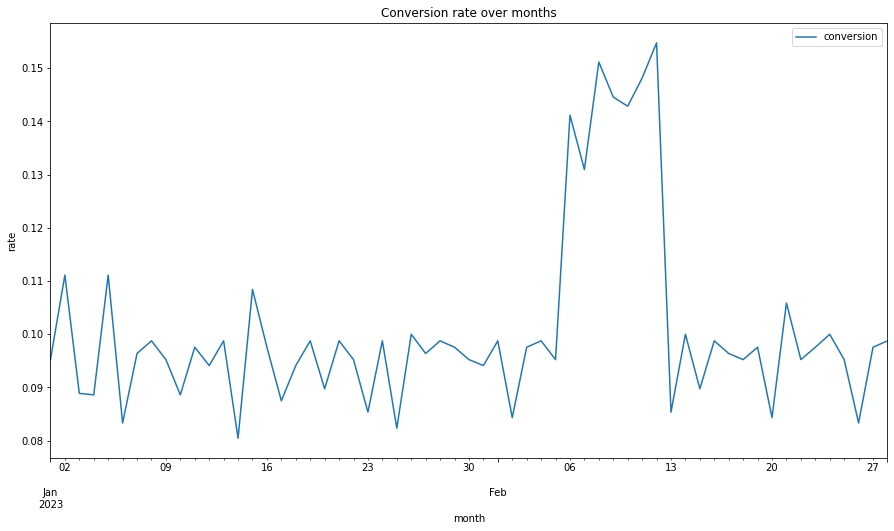

In [15]:
o_c_by_date['conversion'].plot(figsize=(15, 8), title = 'Conversion rate over months', xlabel='month', ylabel='rate', legend='conversion')

У нас есть данные за два месяца,  явных сезонностей не видно (вероятно из-за периода праздников в начале января), однако по данным февраля можно предположить что есть недельная сезонность. Есть также аномальный период 6-12 числа февраля.  В целом можно сказать, что недели было бы достаточно для проведения A/B теста

Расчёт объёма выборки для детекции изменения конверсии  конверссии в +5% при  исходной конверсии 10%:  
-  599 пользователей (по Ewan's Awesome A/B tools)

Скриншот расчёта:  

https://sun9-16.userapi.com/impg/HlfRLM34NCLsBjqu115nZ88hFs1V9pU08gNpEA/QTuMowokaqY.jpg?size=1121x772&quality=95&sign=86e28eae3d8e3d2ccfea2ddcf44f0a03&type=album

# Задание 5. Корректность течения эксперимента

In [32]:
data_4_days = pd.read_csv('m8_task\Data for monitoring - first 4 days.csv')
print(data_4_days.shape)
print(data_results.dtypes)

data_4_days.date =  pd.to_datetime(data_results.date, format='%d.%m.%Y') 
print(data_results.head(5))
print(data_results.tail(5))

# дубликаты
print(data_4_days.duplicated(subset='user_id', keep=False).value_counts())


(966, 4)
date         object
group        object
user_id       int64
converted     int64
dtype: object
        date    group  user_id  converted
0 2023-03-01  control   106085          1
1 2023-03-01  control   106086          1
2 2023-03-01  control   106087          1
3 2023-03-01  control   106088          1
4 2023-03-01  control   106089          1
          date      group  user_id  converted
961 2023-03-04  treatment   107046          0
962 2023-03-04  treatment   107047          0
963 2023-03-04  treatment   107048          0
964 2023-03-04  treatment   107049          0
965 2023-03-04  treatment   107050          0
False    966
Name: count, dtype: int64


In [33]:
# разделить датасеты на тест и контроль

data_4_days_contr = data_4_days.loc[data_4_days.group == 'control', :]
data_4_days_treat= data_4_days.loc[data_4_days.group == 'treatment', :]
data_4_days_contr_users = data_4_days_contr.loc[:, ['date', 'user_id']].groupby(['date']).count()
data_4_days_treat_users = data_4_days_treat.loc[:, ['date', 'user_id']].groupby(['date']).count()


In [31]:
data_4_days_treat_users

,user_id
date,
2023-03-01,122
2023-03-02,119
2023-03-03,111
2023-03-04,11


<AxesSubplot:xlabel='date'>

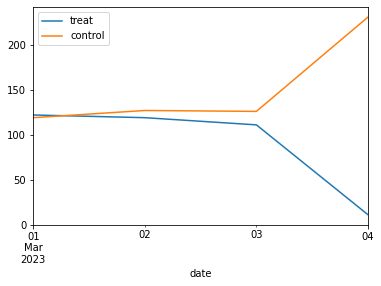

In [52]:
# график числа пользователей

ax = data_4_days_treat_users['user_id'].plot(legend  = True, label = 'treat')
data_4_days_contr_users['user_id'].plot(ax=ax, legend  = True, label = 'control')


На четвёртый день наблюдается аномалия: резкое падение числа пользователей открывших e-mail в  тестовой группе и рост открывших e-mail в контрольной  
Но эта аномалия развивалась начиная со второго дня  
Можно подозревать, что в методике проведения эксперимента есть ошибка, связанная с рассылкой

In [41]:


data_4_days_contr_conv = data_4_days_contr.groupby(['date']).agg({'user_id': 'count', 'converted': 'sum'})
data_4_days_contr_conv['conv_rate'] = data_4_days_contr_conv.converted / data_4_days_contr_conv.user_id


data_4_days_treat_conv = data_4_days_treat.groupby(['date']).agg({'user_id': 'count', 'converted': 'sum'})
data_4_days_treat_conv['conv_rate'] = data_4_days_treat_conv.converted / data_4_days_treat_conv.user_id
 

<AxesSubplot:xlabel='date'>

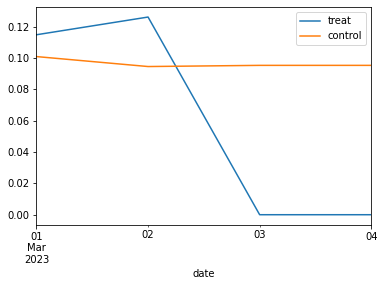

In [56]:
# график уровня конверсии

ax = data_4_days_treat_conv['conv_rate'].plot(legend  = True, label = 'treat')
data_4_days_contr_conv['conv_rate'].plot(ax=ax, legend  = True, label = 'control')

Здесь видно, что первые два дня эксперимент шёл нормально, но что-то испортилось на третий день

# Задание 6. Завершение теста

In [3]:
data_results = pd.read_csv('m8_task\Data for results.csv')

In [5]:
print(data_results.shape)
print(data_results.dtypes)

data_results.date =  pd.to_datetime(data_results.date, format='%d.%m.%Y') 
print(data_results.head(5))
print(data_results.tail(5))

(1205, 4)
date         object
group        object
user_id       int64
converted     int64
dtype: object
        date    group  user_id  converted
0 2023-03-01  control   106085          1
1 2023-03-01  control   106086          1
2 2023-03-01  control   106087          1
3 2023-03-01  control   106088          1
4 2023-03-01  control   106089          1
           date      group  user_id  converted
1200 2023-03-05  treatment   107285          0
1201 2023-03-05  treatment   107286          0
1202 2023-03-05  treatment   107287          0
1203 2023-03-05  treatment   107288          0
1204 2023-03-05  treatment   107289          0


In [6]:
# разделить датасеты на тест и контроль

data_results_contr = data_results.loc[data_results.group == 'control', :]
data_results_treat= data_results.loc[data_results.group == 'treatment', :]

# посчитать число юзеров в день и число открывших ссылку

data_results_contr_conv = data_results_contr.groupby(['date']).agg({'user_id': 'count', 'converted': 'sum'})
data_results_contr_conv['conv_rate'] = data_results_contr_conv.converted / data_results_contr_conv.user_id


data_results_treat_conv = data_results_treat.groupby(['date']).agg({'user_id': 'count', 'converted': 'sum'})
data_results_treat_conv['conv_rate'] = data_results_treat_conv.converted / data_results_treat_conv.user_id

<AxesSubplot:xlabel='date'>

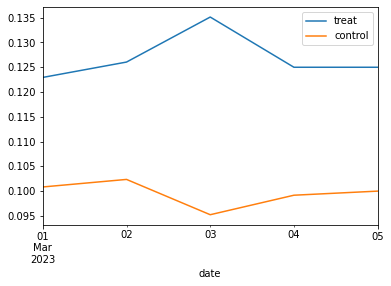

In [7]:
# график уровня конверсии

ax = data_results_treat_conv['conv_rate'].plot(legend  = True, label = 'treat')
data_results_contr_conv['conv_rate'].plot(ax=ax, legend  = True, label = 'control')

In [8]:
data_results_treat_conv

,user_id,converted,conv_rate
date,,,
2023-03-01,122,15,0.122951
2023-03-02,119,15,0.126050
2023-03-03,111,15,0.135135
2023-03-04,120,15,0.125000
2023-03-05,120,15,0.125000


In [10]:
# данные для статистического теста
print('treat')
print(data_results_treat_conv.user_id.sum())
print(data_results_treat_conv.converted.sum())
print('control')
print(data_results_contr_conv.user_id.sum())
print(data_results_contr_conv.converted.sum())

treat
592
75
control
613
61


Для проверки был применён хи-квадрат тест  
https://www.evanmiller.org/ab-testing/chi-squared.html  

Сравнение результатов с параметром p=0.14 показало (уровень уверенности 95%), что разница в уровне конверсии незначима

Ссылка на скриншот расчёта:  
https://sun9-28.userapi.com/impg/rYECzofSEX1WZSplGhRxViWNfbLNkAHZwFUvvg/YXLJN6LJiXU.jpg?size=1090x647&quality=95&sign=d42c92a08211f45cbc73fefca8c50cbb&type=album

## Вывод  
Расчёт статистической значимости различий тестовой и контрольной групп показал, что внеёсённое изменение не приводить к значимому повышению числа кликов по ссылкам в email.